<a href="https://colab.research.google.com/github/masags17/Python/blob/main/AnalisisLuis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

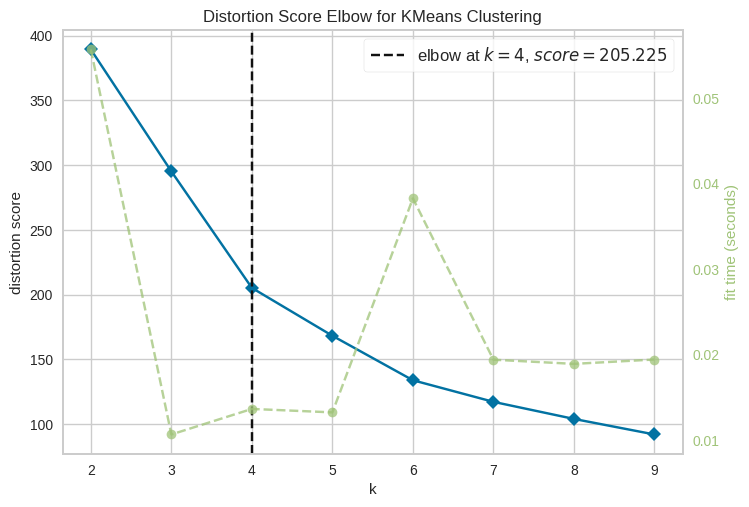

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans - Silhouette Score: 0.404
KMeans - Davies-Bouldin Index: 0.931
Agglomerative - Silhouette Score: 0.361
Agglomerative - Davies-Bouldin Index: 1.016


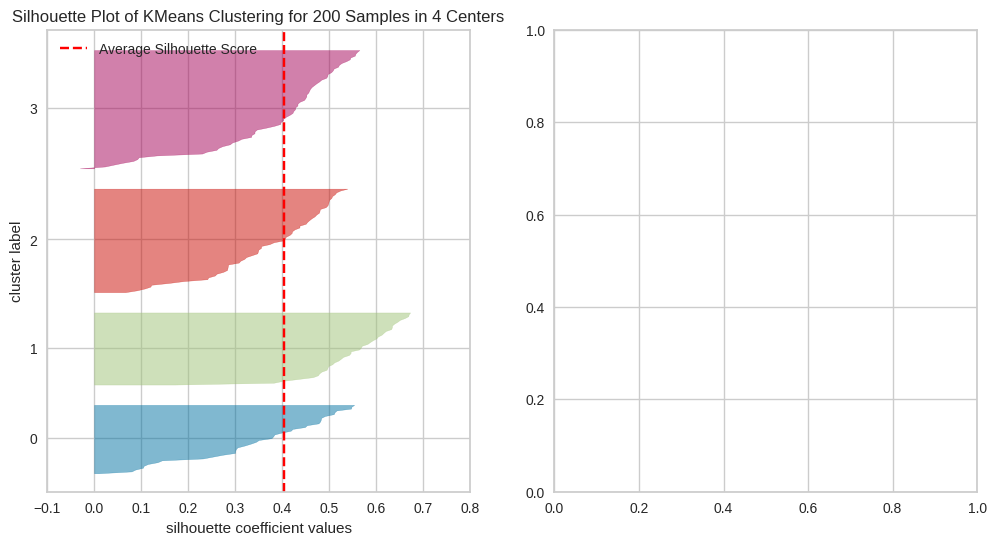

<Figure size 800x550 with 0 Axes>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/DATASET/")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

# Cargar datos
data = pd.read_csv('Mall_Customers.csv')

# Preprocesamiento
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering con KMeans
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(X_scaled)
visualizer.show()

k_optimal = visualizer.elbow_value_
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

# Evaluación KMeans
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
db_kmeans = davies_bouldin_score(X_scaled, labels_kmeans)
print(f"KMeans - Silhouette Score: {silhouette_kmeans:.3f}")
print(f"KMeans - Davies-Bouldin Index: {db_kmeans:.3f}")

# Clustering con Agglomerative
agglom = AgglomerativeClustering(n_clusters=k_optimal)
agglom.fit(X_scaled)
labels_agglom = agglom.labels_

# Evaluación Agglomerative
silhouette_agglom = silhouette_score(X_scaled, labels_agglom)
db_agglom = davies_bouldin_score(X_scaled, labels_agglom)
print(f"Agglomerative - Silhouette Score: {silhouette_agglom:.3f}")
print(f"Agglomerative - Davies-Bouldin Index: {db_agglom:.3f}")

# Visualización de resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax1)
visualizer.fit(X_scaled)
visualizer.show()

# Calcular la matriz de enlace para Agglomerative Clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Crear el dendrograma
dendrogram(linkage_matrix, ax=ax2)
ax2.set_title('Hierarchical Clustering Dendrogram')
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Distance')

plt.tight_layout()
plt.show()